In [185]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
import mtdnetwork.network as network
import mtdnetwork.hacker as hacker
from mtdnetwork.actions import ActionManager
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

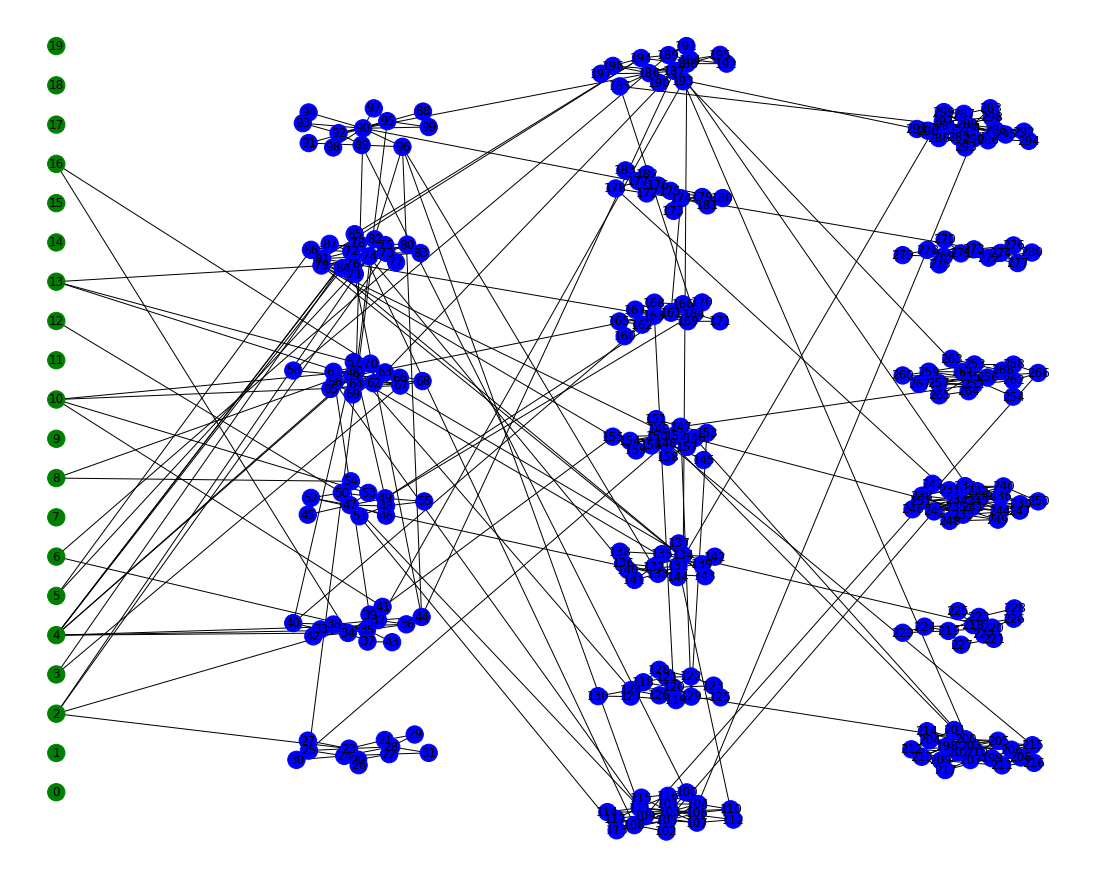

In [199]:
test_network = network.Network(300, 20, 20, 4)
action_manager = test_network.get_action_manager()
test_network.draw()

In [200]:
adversary = hacker.Hacker(test_network)

In [201]:
curr_time = 0
time_step = 1
for curr_time in range(200000):
    test_network.step(curr_time)
    adversary.step(curr_time)
    if adversary.done:
        break
    
print("DONE")
print("TIME:", curr_time)

INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:vuln-a29fd617-75dd-4fc2-b5b9-8c34d55978fe:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:5:centos:3
INFO:vuln-ade1aabf-60a2-4855-a0c2-cb1b1a655697:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:10:ubuntu:10.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:19:ubuntu:10.04
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:67:ubuntu:18.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:62:freebsd:9
INFO:mtdnetwork.hacker:VULN COMPROMISE:66:ubuntu:14.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:68:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:0:windows:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:4:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:6:freebsd:10
INFO:mtdnetwork.hacker:VULN COMPROMISE:7:freebsd:11
INFO:mtdnetwork.hacker:VULN COMPROMISE:9:centos:4
INFO:mtdnetwork.hacker:VULN COMPROMISE:11:centos:3
INFO:mtdnetwork.hacker:VULN COMPROMISE:18:

DONE
TIME: 199999


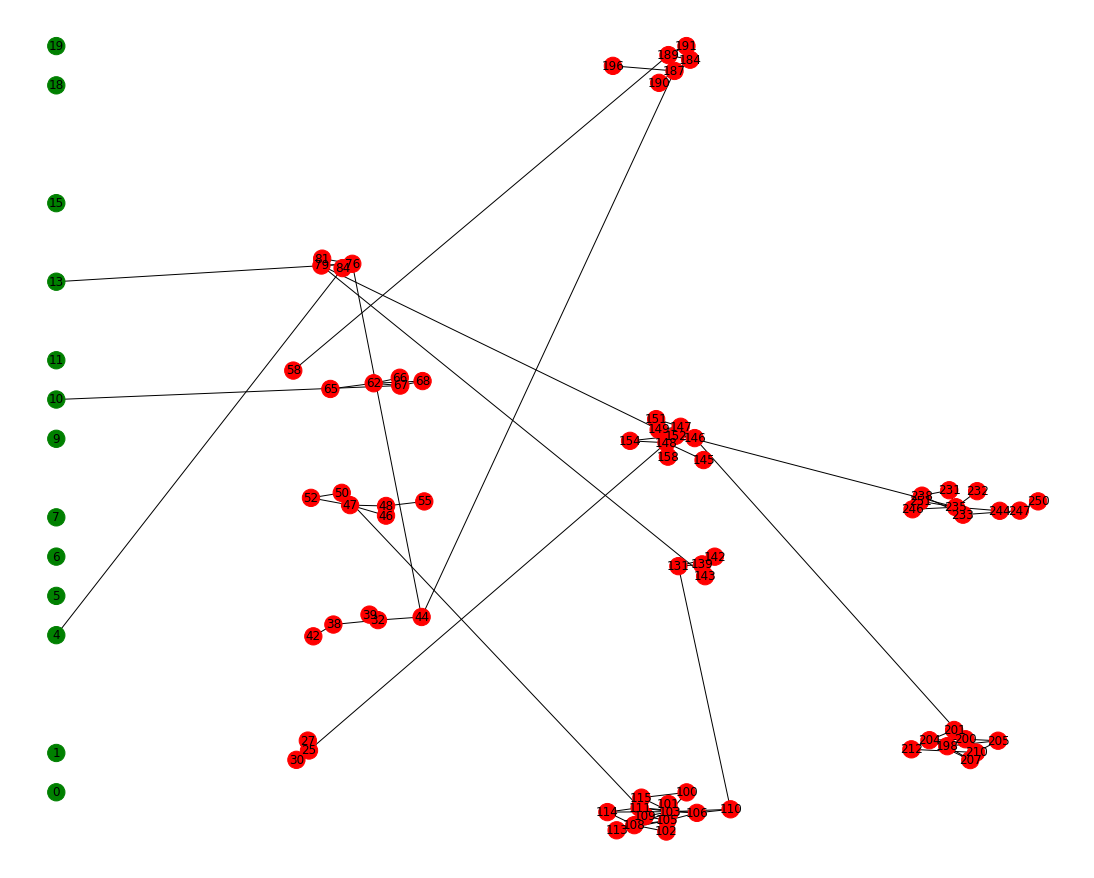

In [202]:
test_network.draw_compromised(adversary.compromised_hosts)

In [203]:
adversary.get_statistics()

{'Total Host Compromises': 87,
 'Total User Compromises': 90,
 'Total Vuln Compromises': 66,
 'Total Reuse Pass Compromises': 19,
 'Total Password Spray Compromises': 2,
 'Total Actions Blocked by MTD': 0}

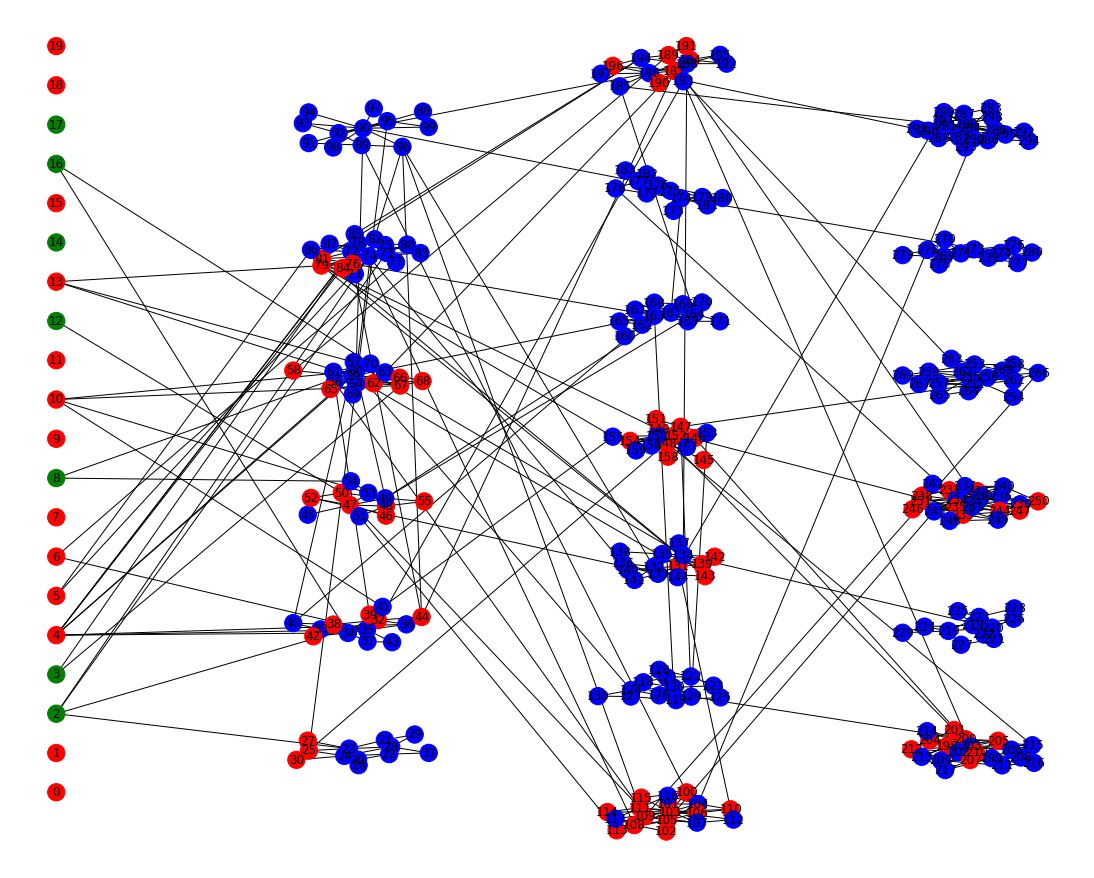

In [204]:
test_network.draw()